![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


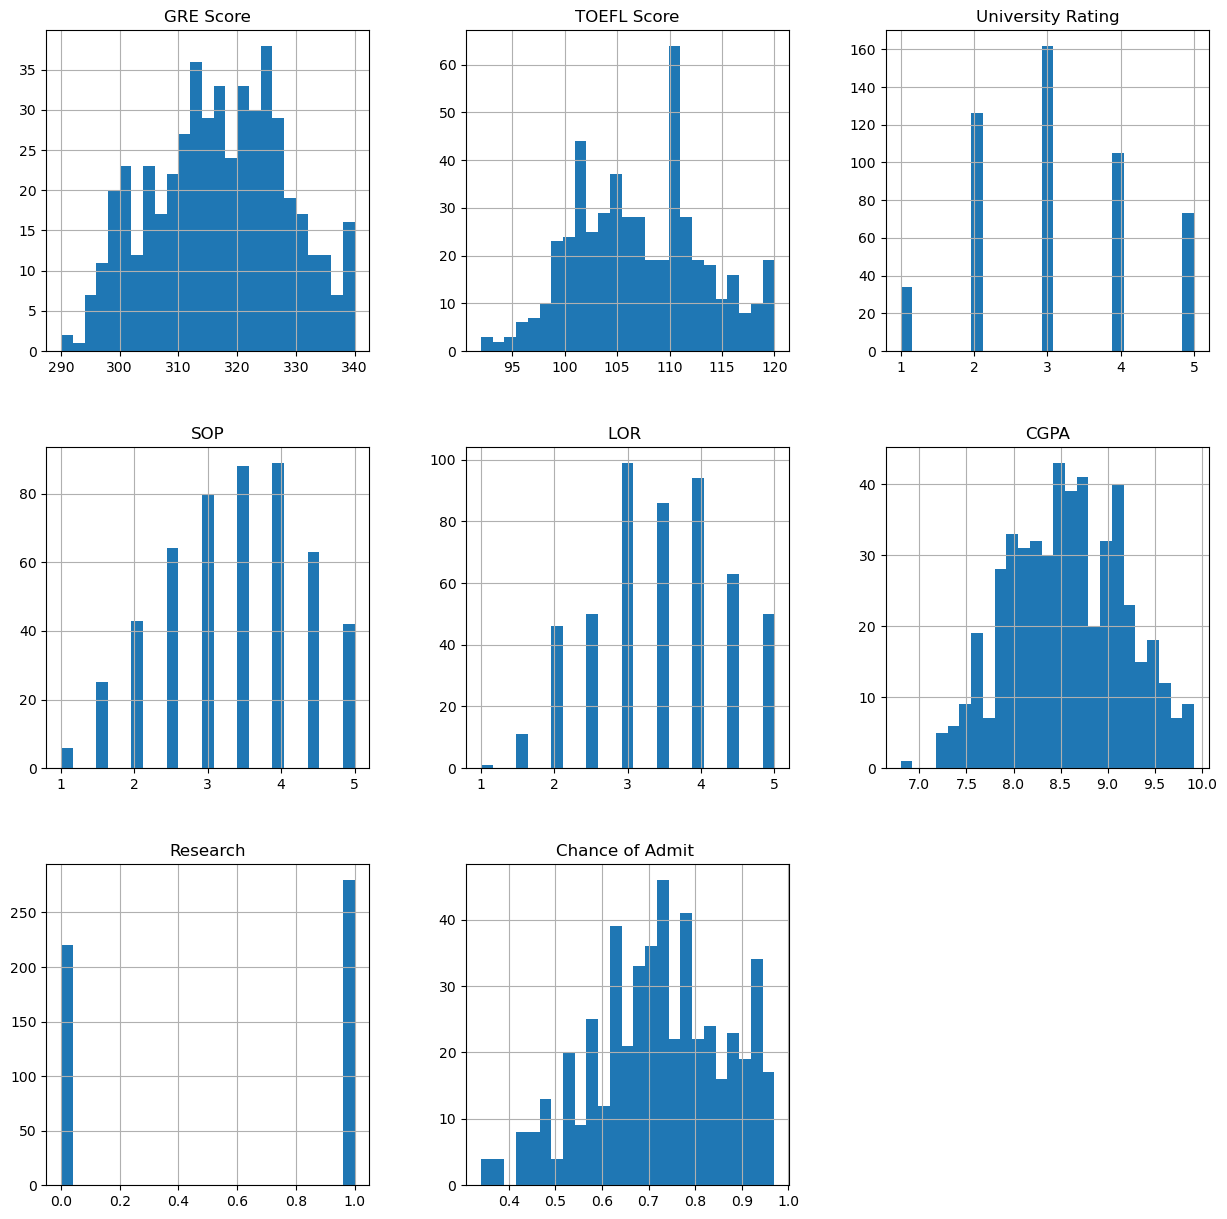

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [10]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [12]:
# Normalización de variables predictoras (X) con la función StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = pd.DataFrame(data=yTrain, index=yTrain.index)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = pd.DataFrame(data=yTest, index=yTest.index)
Y_test = np.array(yTest)

In [13]:
# Definición de dimensiones de salida, varaibles de interés
#Y_train = np.array(Y_train)
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [14]:
# Definición de dimensiones de entrada, varibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [106]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [107]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

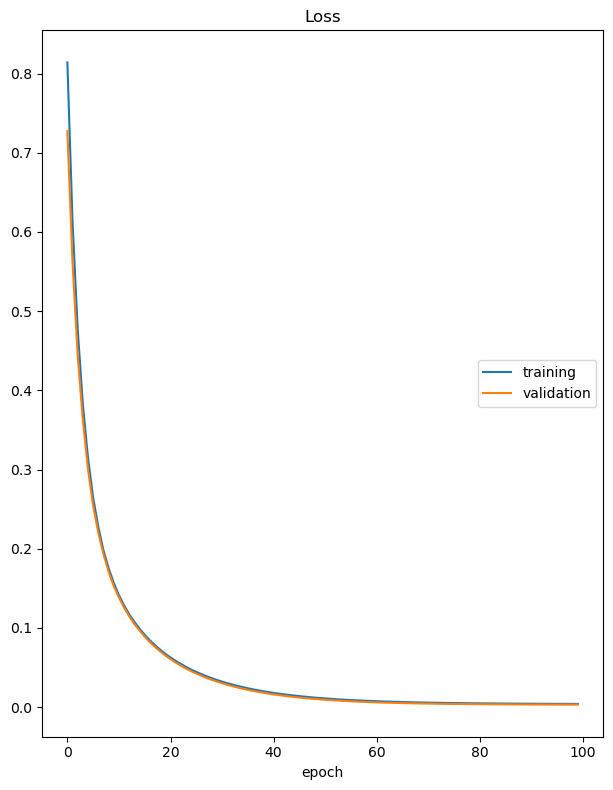

Loss
	training         	 (min:    0.004, max:    0.814, cur:    0.004)
	validation       	 (min:    0.003, max:    0.727, cur:    0.003)
11/11 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0032


In [108]:
# Entrenamiento de la red neuronal con 50 épocas y después con 100
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

Definimos un modelo tipo secuencial, en donde secuencialmente vamos poniendo cuáles son las diferentes capas que tiene nuestra red. Nuestro optimizador es Stochastic Gradient Descent, dado que es probable que este nos acerque a obtener un muy buen resultado.

Le decimos al algoritmo que use 50 épocas para observar en la gráfica su comportamiento. En este caso, después de la época 20 la pérdida entre validación y entrenamiento comienza a estabilizarse; sin embargo, este sigue disminuyendo hasta que se llega a 50 épocas. Decidimos, por último, usar 100 épocas y observar si hay una estabilización más notoria. Cuando usamos 100 épocas, notamos que aproximadamente en 40 se estabiliza, no 20.

#### Usamos función earlystop

In [109]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [110]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [111]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 0s 34ms/step - loss: 0.8290 - val_loss: 0.7321
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.7391 - val_loss: 0.6570
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6636 - val_loss: 0.5928
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5980 - val_loss: 0.5367
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5403 - val_loss: 0.4869
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4899 - val_loss: 0.4442
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.4453 - val_loss: 0.4054
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4063 - val_loss: 0.3706
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3699 - val_loss: 0.3395
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3380 - val_loss: 0.3109
Epoch 11/50
3/3 [=====================

In [112]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Usamos MAE
model.compile(optimizer='sgd', loss='mean_absolute_error')

In [113]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [114]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 0s 25ms/step - loss: 1.6064 - val_loss: 1.5772
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 1.5277 - val_loss: 1.4955
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 1.4511 - val_loss: 1.4145
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 1.3754 - val_loss: 1.3339
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 1.3001 - val_loss: 1.2568
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 1.2278 - val_loss: 1.1812
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 1.1577 - val_loss: 1.1110
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 1.0903 - val_loss: 1.0434
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 1.0252 - val_loss: 0.9784
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.9656 - val_loss: 0.9184
Epoch 11/50
3/3 [=====================

Para salir de dudas, usamos una función earlystop para evaluar hasta que época hay pérdida y, por último, si esta se estabiliza no siga evaluando épocas. En este caso si la pérdida en validación (monitor="val_loss") no cambia por 2 períodos o por 2 épocas (patience=2), este le dice al algoritmo que no se entrene más. En primer lugar, con una medición del MSE y MAE evaluamos la pérdida en validación y entrenamiento con 50 épocas dado que se estabiliza por los lados de 40.

MSE Validación: 0.026 MSE Entrenamiento: 0.024

MAE Validación: 0.33 MAE Entrenamiento: 0.33

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

### Primera configuración graficando la funcion de perdida en base al MSE (_Error Cuadratico Medio_)

En esta primera configuración de multicapa, definimos un modelo secuencial como en los puntos anteriores, y vamos adicionando las capas respectivas de la red una a una. 

Con una funcion de activación de tipo _'relu'_, que permite normalizar en 0 los valores negativos ya que estamos trabajando con valores de salida entre 0 y 1. Agregamos una capa densa de entrada con 10 neuronas, cantidad escogida por la aproximación a las inputs que tenemos de nuestros datos. Definimos 3 capas densas ocultas con 30, 20 y 10 neuronas respectivamente, cantidad escogida en base a las neuronas de entrada, para acercarnos a nuestra capa de salida que contiene 1 neurona. Entre capas aplicamos regularización para disminuir problemas de sobreajuste con _'Dropout'_ del 50%.

Finalmente, presentamos la arquitectura de la red neuronal, como se observa en el siguiente cuadro de codigo:

In [97]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model_nn_multi5 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
# Se definen 3 capas internas con 30 neuronas, 20 y 10 neuronas respectivamente y entre ellas realizamos un dropout
# del 50% de regularización para reducir problemas de sobreajuste.
model_nn_multi5.add(Dense(10, input_shape=(dims,),activation='relu'))
model_nn_multi5.add(Dropout(0.5))
model_nn_multi5.add(Dense(30,activation='relu'))
model_nn_multi5.add(Dropout(0.5))
model_nn_multi5.add(Dense(20,activation='relu'))
model_nn_multi5.add(Dropout(0.5))
model_nn_multi5.add(Dense(10,activation='relu'))
model_nn_multi5.add(Dropout(0.5))
model_nn_multi5.add(Dense(output_var))
model_nn_multi5.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_nn_multi5.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

A continuación, definimos el optimizador de tipo **_'adam'_** ya que investigando encontramos que este optimizador combina el método de descenso del gradiente estocastico (SGD) utilizado en los puntos anteriores con adaptaciones de tasa de aprendizaje lo cual consideramos que podria darnos un entrenamiento más eficiente. 

Definimos la funcion de perdida con **MSE** como metrica. Aplicamos una funcion de **_'EarlyStopping'_** que monitorea la funcion de perdida y definimos el argumento **_'patiente=10'_** para indicarle a la red que se detenga si el valor de perdida no cambia en un maximo de 10 epocas. 

Realizamos ademas una sub-separacion de datos, utilizando los datos de entrenamiento y sacando unos datos de validacion con los que presentaremos el grafico de comportamiento de **MSE vs epocas**. 

Finalmente realizamos iterativamente pruebas con varias cantidades de epocas y encontramos que el algoritmo llega a un patron de estabilizacion con alrededor **200 epocas**.

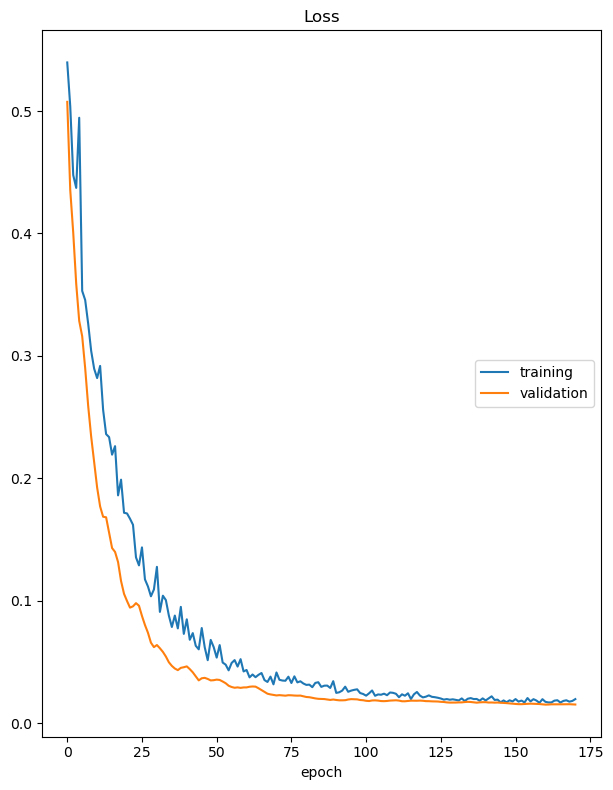

Loss
	training         	 (min:    0.017, max:    0.540, cur:    0.020)
	validation       	 (min:    0.015, max:    0.507, cur:    0.015)
10/10 [==============================] - 0s 10ms/step - loss: 0.0198 - val_loss: 0.0154
Epoch 171: early stopping


In [98]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_nn_multi5.compile(optimizer='adam', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Sub-Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_trainn, X_val, Y_trainn, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

# Entrenamiento de la red neuronal con 200 épocas
model_nn_multi5.fit(X_trainn, Y_trainn,
          validation_data = (X_val, Y_val),
          epochs=200, 
          callbacks=[PlotLossesKeras(), early_stop])

Observamos que en la epoca 171 nuestra funcion de **_'EarlyStopping'_** optimizo la ejecución e identifico que los valores de MSE no cambiaron en 10 epocas consecutivas, lo cual indica que se llego a la estabilizaión del modelo y no es necesario continuar avanzando en las epocas siguientes. 

El modelo nos entrega entonces los siguientes valores:

In [104]:
# Obtener las predicciones en el conjunto de test
y_pred = model_nn_multi5.predict(X_test)
mse_nn_multi5 = mean_squared_error(Y_test, y_pred)   
mae_nn_multi5 = mean_absolute_error(Y_test, y_pred)   
print(f"MSE: {mse_nn_multi5:.4f} \nMAE: {mae_nn_multi5:.4f}")

5/5 [==============================] - 0s 712us/step
MSE: 0.0168 
MAE: 0.1027


Lo que nos muestra un indice de sobreajuste adecuado o bajo, ya que aunque ambos **MSE** (el presentado en la grafica arriba como **_'val_loss'_** y el **'MSE'**) no son iguales tampoco son muy lejanos, dando a entender que la configuracion de la red neuronal tiene un muy buen comportamiento con datos completamente nuevos. 

### Segunda configuración pero esta vez graficando la funcion de perdida en base al MAE (Error Medio Absoluto)

Esta configuración es exactamente igual a la anterior, pero cambia en que la función de perdida esta vez está calculada con el **_'Error Medio Absoluto'_**.

In [100]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model_nn_multi5_b = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
# Se definen 2 capas internas con 30 neuronas, 20 y 10 neuronas respectivamente y entre ellas realizamos un dropout
# del 50% de regularización para reducir problemas de sobreajuste.
model_nn_multi5_b.add(Dense(10, input_shape=(dims,),activation='relu'))
model_nn_multi5_b.add(Dropout(0.5))
model_nn_multi5_b.add(Dense(30,activation='relu'))
model_nn_multi5_b.add(Dropout(0.5))
model_nn_multi5_b.add(Dense(20,activation='relu'))
model_nn_multi5_b.add(Dropout(0.5))
model_nn_multi5_b.add(Dense(10,activation='relu'))
model_nn_multi5_b.add(Dropout(0.5))
model_nn_multi5_b.add(Dense(output_var))
model_nn_multi5_b.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_nn_multi5_b.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

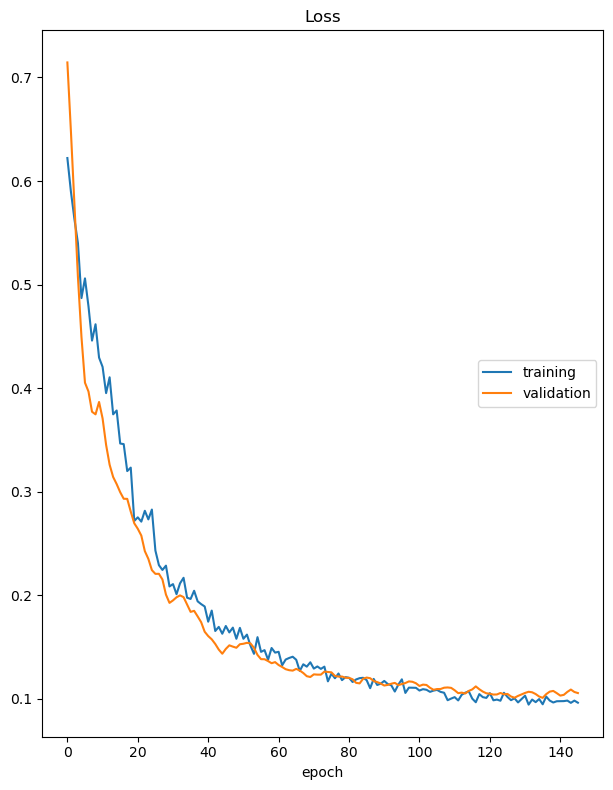

Loss
	training         	 (min:    0.095, max:    0.622, cur:    0.096)
	validation       	 (min:    0.101, max:    0.714, cur:    0.106)
10/10 [==============================] - 0s 10ms/step - loss: 0.0964 - val_loss: 0.1057
Epoch 146: early stopping


In [101]:
# Definición de función de perdida. Se usa mean_absolute_error dado que es un ejercicio de regresión
model_nn_multi5_b.compile(optimizer='adam', loss='mae')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Sub-Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_trainn, X_val, Y_trainn, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

# Entrenamiento de la red neuronal con 200 épocas
model_nn_multi5_b.fit(X_trainn, Y_trainn,
          validation_data = (X_val, Y_val),
          epochs=200, 
          callbacks=[PlotLossesKeras(), early_stop])

Observamos que en la epoca 146 nuestra funcion de 'EarlyStopping' optimizo la ejecución e identifico que los valores de MSE no cambiaron en 10 epocas consecutivas, lo cual indica que se llego a la estabilizaión del modelo y no es necesario continuar avanzando en las epocas siguientes.

El modelo nos entrega entonces los siguientes valores:

In [103]:
# Obtener las predicciones en el conjunto de test
y_pred = model_nn_multi5_b.predict(X_test)
mse_nn_multi5_b = mean_squared_error(Y_test, y_pred)   
mae_nn_multi5_b = mean_absolute_error(Y_test, y_pred)   
print(f"MSE con el set de test: {mse_nn_multi5_b:.4f} \nMAE con el set de test: {mae_nn_multi5_b:.4f}")

5/5 [==============================] - 0s 637us/step
MSE con el set de test: 0.0175 
MAE con el set de test: 0.1060


Lo que nos muestra un indice de sobreajuste adecuado o bajo, ya que aunque ambos **MSE** (el presentado en la grafica arriba como **_'val_loss'_** y el **'MSE'**) no son iguales tampoco son muy lejanos, dando a entender que la configuracion de la red neuronal tiene un muy buen comportamiento con datos completamente nuevos.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

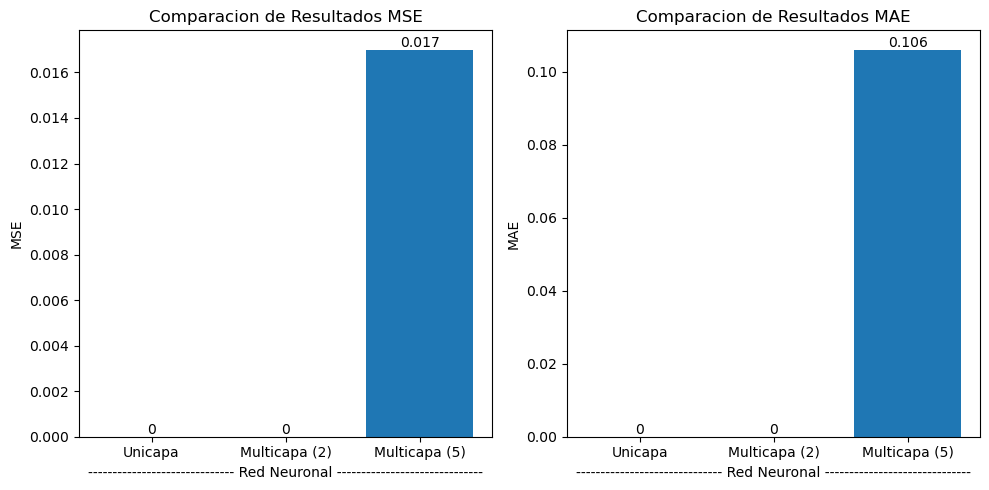

In [105]:
# Celda 4
# Comparando Resultados
etiquetas = ['Unicapa', 'Multicapa (2)', 'Multicapa (5)']
valores_mse = [0, 0, mse_nn_multi5]
valores_mse = [round(x, 3) for x in valores_mse]

valores_mae = [0, 0, mae_nn_multi5_b]
valores_mae = [round(x, 3) for x in valores_mae]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.bar(etiquetas, valores_mse)
for i in range(len(valores_mse)):
    ax1.text(i, valores_mse[i], valores_mse[i], ha='center', va='bottom')
ax1.set_title('Comparacion de Resultados MSE')
ax1.set_xlabel(30*'-' + ' Red Neuronal ' + 30*'-')
ax1.set_ylabel('MSE')
ax1.set_xticks(range(len(etiquetas)))
ax1.set_xticklabels(etiquetas, rotation=0)

ax2.bar(etiquetas, valores_mae)
for i in range(len(valores_mae)):
    ax2.text(i, valores_mae[i], valores_mae[i], ha='center', va='bottom')
ax2.set_title('Comparacion de Resultados MAE')
ax2.set_xlabel(30*'-' + ' Red Neuronal ' + 30*'-')
ax2.set_ylabel('MAE')
ax2.set_xticks(range(len(etiquetas)))
ax2.set_xticklabels(etiquetas, rotation=0)

plt.tight_layout()
plt.show()